In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from astropy.io import fits

from cycspec_simulator import (
    TemplateProfile,
    BasebandModel,
    FreqOnlyPredictor,
    ExponentialScatteringModel,
    Time,
    pspec_numba,
)

%matplotlib notebook

In [3]:
template_file = "B1937+21.Rcvr1_2.GUPPI.15y.x.sum.sm"
template = TemplateProfile.from_file(template_file)
template.normalize()
template.make_posdef()

Adjusting I**2 by 5.5361972783884994e-08


In [4]:
pulse_freq = 641.948222127829 # Hz
bandwidth = 1.5625e6 # Hz
predictor = FreqOnlyPredictor(pulse_freq, Time(60000, 0, 0))
model = BasebandModel(template, chan_bw=bandwidth, predictor=predictor)

In [5]:
scattering_model = ExponentialScatteringModel(scattering_time=2e-6, chan_bw=model.chan_bw, cutoff=20)
pattern = scattering_model.realize()

In [6]:
%time data = model.sample(2**19)

CPU times: user 92.4 ms, sys: 17.8 ms, total: 110 ms
Wall time: 108 ms


In [7]:
%time data_scattered = pattern.scatter(data)

CPU times: user 29.7 ms, sys: 732 µs, total: 30.4 ms
Wall time: 29.5 ms


In [8]:
%time pspec = pspec_numba(data_scattered, 128, 256, predictor)

CPU times: user 3.4 s, sys: 27.9 ms, total: 3.42 s
Wall time: 3.42 s


<IPython.core.display.Javascript object>


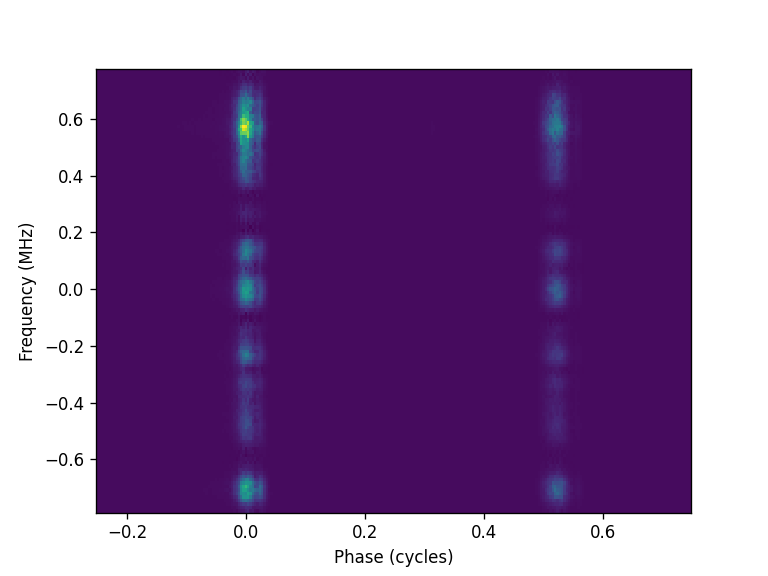

In [9]:
pspec.plot(shift=0.25)
plt.show()